#Parse data

In [ ]:
!pip install nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install contractions

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.2/103.2 KB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 KB 14.1 MB/s eta 0:00:00


In [ ]:
!pip install num2words

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 125.2/125.2 KB 1.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13721 sha256=4f2046722c967877af90950b9f04f6a7566f2176511867e7328331d425e920dd
  Stored in directory: /root/.cache/pip/wheels/70/4a/46/1309fc853b8d395e60bafaf1b6df7845bdd82c95fd59dd8d2b
Successfully built docopt


In [ ]:
#import libraries
import pandas as pd
import nltk 
from nltk.corpus import stopwords
import contractions
from num2words import num2words
import string
from textblob import TextBlob
from nltk.corpus import stopwords , wordnet , brown
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer, WordNetLemmatizer
from wordcloud import WordCloud
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import requests
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
# Set your API key
API_KEY = "fc70d427a83b429285a3ed0d142eea1c"

# Define the base URL and endpoint for the News API
base_url = "https://newsapi.org/v2"
endpoint = "/everything"

# Define the themes you want to search for
keywords = ["politics"]

# Loop through each theme and fetch the top headlines
for key in keywords:
    # Define the query parameters
    params = {
        "apiKey": API_KEY,
        "q": key,
        "pageSize": 100,
        "sortBy": "relevancy"
    }

    # Make the API request
    response = requests.get(base_url + endpoint, params=params)

    # Parse the JSON response
    #200 is success code
    if response.status_code == 200:
        data = response.json()
        articles = data["articles"]

        # Print the article titles and content
        print(f"Top 40 {KeyError} articles:")
        for article in articles:
            print(f"\n{article['title']}")
            print(f"{article['content']}")
    else:
        print(f"Error fetching {key} articles: {response.text}")


Top 40 <class 'KeyError'> articles:

Facebook Is Still Letting Russia Interfere in Politics
Nicolae Fratea is on a mission to purge his Facebook timeline of weird political adverts. Every couple of days, hes presented with accounts that, on the surface, look innocentthey often share the sam… [+3112 chars]

Analysis: America's biggest problem is its politics, not its banks
The dramatic meltdown of Silicon Valley Bank is proving one thing for sure the biggest systemic risk to the United States lies not in its banking system but in its polarized politics.
So far, the Bi… [+10119 chars]

Willow oil: Biden walks political tightrope over Alaska project
US President Joe Biden has approved a major oil and gas drilling project in Alaska, intended to create local investment and thousands of jobs.
But the Willow protect has faced strong opposition from… [+2855 chars]

Politics
Bola Tinubu, the candidate of the ruling All Progressives Congress, won Nigerias presidential election. International obs

In [ ]:
data_list = []
for article in articles:
  data_list.append({
                  "keywords": key,
                  "title": article["title"],
                  "content": article["content"],
                  "url": article["url"],
                  "publishedAt": article["publishedAt"]
  })


# Create a DataFrame from the parsed data
df_politics = pd.DataFrame(data_list)
df_politics['keywords'].value_counts()

politics    100
Name: keywords, dtype: int64

In [ ]:
# Set your API key
API_KEY = "fc70d427a83b429285a3ed0d142eea1c"

# Define the base URL and endpoint for the News API
base_url = "https://newsapi.org/v2"
endpoint = "/everything"

# Define the themes you want to search for
keywords = ["mental health"]

# Loop through each theme and fetch the top headlines
for key in keywords:
    # Define the query parameters
    params = {
        "apiKey": API_KEY,
        "q": key,
        "pageSize": 100,
        "sortBy": "relevancy"
    }

    # Make the API request
    response = requests.get(base_url + endpoint, params=params)

    # Parse the JSON response
    if response.status_code == 200:
        data = response.json()
        articles = data["articles"]

        # Print the article titles and content
        print(f"Top 40 {KeyError} articles:")
        for article in articles:
            print(f"\n{article['title']}")
            print(f"{article['content']}")
    else:
        print(f"Error fetching {key} articles: {response.text}")


Top 40 <class 'KeyError'> articles:

FTC moves to ban BetterHelp from sharing mental health data for ad targeting
The Federal Trade Commission
 has moved to block online counseling company BetterHelp from sharing health data, including mental health information, with the likes of Facebook
 and Snapchat
 for a… [+2448 chars]

Turkey earthquake: How survivors cope with trauma
The death toll from the devastating earthquakes that recently struck Turkey and Syria has climbed beyond 50,000 - and left many more people homeless. It has taken a terrible toll on mental health for… [+5730 chars]

Lawmakers who struggle and have struggled with mental health see power in 'telling the story'
Editors Note: If you or a loved one are facing mental health issues or substance abuse disorders, call The Substance Abuse and Mental Health Services Administration National Helpline at 1-800-662-435… [+10178 chars]

After Turkey's earthquake, a grave mental health toll looms - Reuters
We use cookies and data to

In [ ]:
data_list = []
for article in articles:
  data_list.append({
                  "keywords": key,
                  "title": article["title"],
                  "content": article["content"],
                  "url": article["url"],
                  "publishedAt": article["publishedAt"]
  })


# Create a DataFrame from the parsed data
df_health = pd.DataFrame(data_list)
df_health['keywords'].value_counts()

mental health    100
Name: keywords, dtype: int64

In [ ]:
# Set your API key
API_KEY = "fc70d427a83b429285a3ed0d142eea1c"

# Define the base URL and endpoint for the News API
base_url = "https://newsapi.org/v2"
endpoint = "/everything"

# Define the themes you want to search for
keywords = ["culture"]

# Loop through each theme and fetch the top headlines
for key in keywords:
    # Define the query parameters
    params = {
        "apiKey": API_KEY,
        "q": key,
        "pageSize": 100,
        "sortBy": "relevancy"
    }

    # Make the API request
    response = requests.get(base_url + endpoint, params=params)

    # Parse the JSON response
    if response.status_code == 200:
        data = response.json()
        articles = data["articles"]

        # Print the article titles and content
        print(f"Top 40 {KeyError} articles:")
        for article in articles:
            print(f"\n{article['title']}")
            print(f"{article['content']}")
    else:
        print(f"Error fetching {key} articles: {response.text}")

Top 40 <class 'KeyError'> articles:

The Out-of-Touch Adults' Guide to Kid Culture: What Is a 'Tradwife Influencer'?
Hypocrisy and politicians have always gone hand-in-Satans hoof, but lately, young peoples acceptance of transgender people and non-traditional sexuality is slamming hard against the wall of scared, o… [+6611 chars]

This Is One of the Best Nerd Culture Moments in TV History
This week, Party Down returns to Starz. In its original iteration the beloved comedyabout a group of LA cater-waiters stuck together both at work and in various stages of crushing disillusionmentlast… [+2871 chars]

The Case for Software Criticism
Heres a quick typology of tech journalism today: news reporting (Amazon announces layoffs affecting 18,000 employees), gadget reviews, company and founder profiles, opinion essays (Zeynep Tufecki et … [+3143 chars]

Opinion: Our work-obsessed culture is killing freedom
Editors Note: Kirsten Powers is a CNN senior political analyst and New York Times bestsell

In [ ]:
data_list = []
for article in articles:
  data_list.append({
                  "keywords": key,
                  "title": article["title"],
                  "content": article["content"],
                  "url": article["url"],
                  "publishedAt": article["publishedAt"]
  })


# Create a DataFrame from the parsed data
df_culture = pd.DataFrame(data_list)
df_culture['keywords'].value_counts()

culture    100
Name: keywords, dtype: int64

In [ ]:
# Set your API key
API_KEY = "fc70d427a83b429285a3ed0d142eea1c"

# Define the base URL and endpoint for the News API
base_url = "https://newsapi.org/v2"
endpoint = "/everything"

# Define the themes you want to search for
keywords = ["business"]

# Loop through each theme and fetch the top headlines
for key in keywords:
    # Define the query parameters
    params = {
        "apiKey": API_KEY,
        "q": key,
        "pageSize": 100,
        "sortBy": "relevancy"
    }

    # Make the API request
    response = requests.get(base_url + endpoint, params=params)

    # Parse the JSON response
    if response.status_code == 200:
        data = response.json()
        articles = data["articles"]

        # Print the article titles and content
        print(f"Top 40 {KeyError} articles:")
        for article in articles:
            print(f"\n{article['title']}")
            print(f"{article['content']}")
    else:
        print(f"Error fetching {key} articles: {response.text}")

Top 40 <class 'KeyError'> articles:

HSBC is buying SVB's UK business for just over $1
HSBC has scooped up the UK arm of Silicon Valley Bank for £1 ($1.2), just days after its business in the United States collapsed in stunning fashion.
SVB UK had been placed into insolvency by the Ba… [+585 chars]

Apple Plans to Bring Back the iPhone SE 4 After Reportedly Trashing New Cheap Phone Plans
Apple is apparently back in the business of making cheap[er] iPhones in its SE lineup, barely a month after analysts thought Apple had canceled work on the SE 4.
Noted Apple analyst Ming-Chi Kuo twe… [+2712 chars]

This is Nokia’s new logo
For the first time in nearly 60 years, one-time smartphone giant Nokia is changing its iconic logo. On Sunday, before the official start of Mobile World Congress Barcelona, the company unveiled a new… [+1559 chars]

Business
The failure of Silicon Valley Bank, a mid-sized American lender, sent shock waves through the financial system. SVB specialised in offering bank

In [ ]:
data_list = []
for article in articles:
  data_list.append({
                  "keywords": key,
                  "title": article["title"],
                  "content": article["content"],
                  "url": article["url"],
                  "publishedAt": article["publishedAt"]
  })


# Create a DataFrame from the parsed data
df_business = pd.DataFrame(data_list)
df_business['keywords'].value_counts()

business    100
Name: keywords, dtype: int64

In [ ]:
df = pd.concat([df_business, df_politics, df_culture, df_health], ignore_index=True)
df

,keywords,title,content,url,publishedAt
0,business,HSBC is buying SVB's UK business for just over $1,HSBC has scooped up the UK arm of Silicon Vall...,https://www.cnn.com/2023/03/13/investing/svb-u...,2023-03-13T07:29:36Z
1,business,Apple Plans to Bring Back the iPhone SE 4 Afte...,Apple is apparently back in the business of ma...,https://gizmodo.com/apple-iphone-se-4-cheap-bu...,2023-02-27T22:10:00Z
2,business,This is Nokia’s new logo,"For the first time in nearly 60 years, one-tim...",https://www.engadget.com/this-is-nokias-new-lo...,2023-02-26T17:09:34Z
3,business,Business,"The failure of Silicon Valley Bank, a mid-size...",https://www.economist.com/the-world-this-week/...,2023-03-16T14:49:28Z
4,business,Business,"Goldman Sachs held an investors day, its first...",https://www.economist.com/the-world-this-week/...,2023-03-02T15:05:16Z
...,...,...,...,...,...
395,mental health,Clashes over Atlanta's 'Cop City' led to a pro...,Nearly two dozen people are in jail after viol...,https://www.cnn.com/2023/03/08/us/cop-city-exp...,2023-03-08T11:57:18Z
396,mental health,The Son review – Hugh Jackman excels in solid ...,Lets get this out of the way: anyone expecting...,https://www.theguardian.com/film/2023/feb/19/t...,2023-02-19T11:00:07Z
397,mental health,‘This feels more like spin-the-bottle than sci...,"There are nights when I wake up and, in the di...",https://www.theguardian.com/society/2023/feb/2...,2023-02-25T08:00:47Z
398,mental health,"Four-Day Work Weeks Are Good for Your Health, ...",A four-day work week improves employees’ healt...,https://time.com/6256741/four-day-work-week-be...,2023-02-21T00:01:13Z


#Preprocess text

We can see that according to documentation that NewsAPI truncate to 200 chars of unformatted content.

In [ ]:
df.iloc[0,2]

'HSBC has scooped up the UK arm of Silicon Valley Bank for £1 ($1.2), just days after its business in the United States collapsed in stunning fashion.\r\nSVB UK had been placed into insolvency by the Ba… [+585 chars]'

In [ ]:
df.iloc[1,2]

'Apple is apparently back in the business of making cheap[er] iPhones in its SE lineup, barely a month after analysts thought Apple had canceled work on the SE 4.\r\nNoted Apple analyst Ming-Chi Kuo twe… [+2712 chars]'

In [ ]:
df['content'] = df['content'].str.replace('\[\+\d+ chars\]', '', regex=True)

In [ ]:
df.iloc[0,2]

'HSBC has scooped up the UK arm of Silicon Valley Bank for £1 ($1.2), just days after its business in the United States collapsed in stunning fashion.\r\nSVB UK had been placed into insolvency by the Ba… '

In [ ]:
df

,keywords,title,content,url,publishedAt
0,business,HSBC is buying SVB's UK business for just over $1,HSBC has scooped up the UK arm of Silicon Vall...,https://www.cnn.com/2023/03/13/investing/svb-u...,2023-03-13T07:29:36Z
1,business,Apple Plans to Bring Back the iPhone SE 4 Afte...,Apple is apparently back in the business of ma...,https://gizmodo.com/apple-iphone-se-4-cheap-bu...,2023-02-27T22:10:00Z
2,business,This is Nokia’s new logo,"For the first time in nearly 60 years, one-tim...",https://www.engadget.com/this-is-nokias-new-lo...,2023-02-26T17:09:34Z
3,business,Business,"The failure of Silicon Valley Bank, a mid-size...",https://www.economist.com/the-world-this-week/...,2023-03-16T14:49:28Z
4,business,Business,"Goldman Sachs held an investors day, its first...",https://www.economist.com/the-world-this-week/...,2023-03-02T15:05:16Z
...,...,...,...,...,...
395,mental health,Clashes over Atlanta's 'Cop City' led to a pro...,Nearly two dozen people are in jail after viol...,https://www.cnn.com/2023/03/08/us/cop-city-exp...,2023-03-08T11:57:18Z
396,mental health,The Son review – Hugh Jackman excels in solid ...,Lets get this out of the way: anyone expecting...,https://www.theguardian.com/film/2023/feb/19/t...,2023-02-19T11:00:07Z
397,mental health,‘This feels more like spin-the-bottle than sci...,"There are nights when I wake up and, in the di...",https://www.theguardian.com/society/2023/feb/2...,2023-02-25T08:00:47Z
398,mental health,"Four-Day Work Weeks Are Good for Your Health, ...",A four-day work week improves employees’ healt...,https://time.com/6256741/four-day-work-week-be...,2023-02-21T00:01:13Z


In [ ]:
import re

# Define a regular expression pattern to extract text without HTML tags
pattern = r'<.*?>'

# Define a lambda function to extract text and find HTML tags in a string
def extract_text_and_tags(s):
    text = re.sub(pattern, '', s)
    tags = re.findall(pattern, s)
    return text, tags

# Use the apply() method with the lambda function to extract text and find tags from the 'text' column
df[['extracted_text', 'tags']] = df['content'].apply(lambda s: pd.Series(extract_text_and_tags(s)))

df


,keywords,title,content,url,publishedAt,extracted_text,tags
0,business,HSBC is buying SVB's UK business for just over $1,HSBC has scooped up the UK arm of Silicon Vall...,https://www.cnn.com/2023/03/13/investing/svb-u...,2023-03-13T07:29:36Z,HSBC has scooped up the UK arm of Silicon Vall...,[]
1,business,Apple Plans to Bring Back the iPhone SE 4 Afte...,Apple is apparently back in the business of ma...,https://gizmodo.com/apple-iphone-se-4-cheap-bu...,2023-02-27T22:10:00Z,Apple is apparently back in the business of ma...,[]
2,business,This is Nokia’s new logo,"For the first time in nearly 60 years, one-tim...",https://www.engadget.com/this-is-nokias-new-lo...,2023-02-26T17:09:34Z,"For the first time in nearly 60 years, one-tim...",[]
3,business,Business,"The failure of Silicon Valley Bank, a mid-size...",https://www.economist.com/the-world-this-week/...,2023-03-16T14:49:28Z,"The failure of Silicon Valley Bank, a mid-size...",[]
4,business,Business,"Goldman Sachs held an investors day, its first...",https://www.economist.com/the-world-this-week/...,2023-03-02T15:05:16Z,"Goldman Sachs held an investors day, its first...",[]
...,...,...,...,...,...,...,...
395,mental health,Clashes over Atlanta's 'Cop City' led to a pro...,Nearly two dozen people are in jail after viol...,https://www.cnn.com/2023/03/08/us/cop-city-exp...,2023-03-08T11:57:18Z,Nearly two dozen people are in jail after viol...,[]
396,mental health,The Son review – Hugh Jackman excels in solid ...,Lets get this out of the way: anyone expecting...,https://www.theguardian.com/film/2023/feb/19/t...,2023-02-19T11:00:07Z,Lets get this out of the way: anyone expecting...,[]
397,mental health,‘This feels more like spin-the-bottle than sci...,"There are nights when I wake up and, in the di...",https://www.theguardian.com/society/2023/feb/2...,2023-02-25T08:00:47Z,"There are nights when I wake up and, in the di...",[]
398,mental health,"Four-Day Work Weeks Are Good for Your Health, ...",A four-day work week improves employees’ healt...,https://time.com/6256741/four-day-work-week-be...,2023-02-21T00:01:13Z,A four-day work week improves employees’ healt...,[]


In [ ]:
pattern = re.compile(r'<.*?>|\r\n')

# Use the apply() method with a lambda function to remove HTML tags and newlines from the 'text' column
df['clean_text'] = df['content'].apply(lambda x: re.sub(pattern, '', x))

df

,keywords,title,content,url,publishedAt,extracted_text,tags,clean_text,tokenized,stopwords_removed,snowball_stemmer,combined_postag_wnet,lemmatize_word_w_pos,lemmatize_text,new,sentiment
0,business,HSBC is buying SVB's UK business for just over $1,HSBC has scooped up the UK arm of Silicon Vall...,https://www.cnn.com/2023/03/13/investing/svb-u...,2023-03-13T07:29:36Z,HSBC has scooped up the UK arm of Silicon Vall...,[],HSBC has scooped up the UK arm of Silicon Vall...,"[hsbc, has, scooped, up, the, uk, arm, of, sil...","[hsbc, scooped, uk, arm, silicon, valley, bank...","[hsbc, scoop, uk, arm, silicon, valley, bank, ...","[(hsbc, n), (scooped, n), (uk, n), (arm, n), (...","[hsbc, scooped, uk, arm, silicon, valley, bank...",hsbc scooped uk arm silicon valley bank £1 12 ...,hsbc scooped uk arm silicon valley bank £1 12 ...,Positive
1,business,Apple Plans to Bring Back the iPhone SE 4 Afte...,Apple is apparently back in the business of ma...,https://gizmodo.com/apple-iphone-se-4-cheap-bu...,2023-02-27T22:10:00Z,Apple is apparently back in the business of ma...,[],Apple is apparently back in the business of ma...,"[apple, is, apparently, back, in, the, busines...","[apple, apparently, back, business, making, ch...","[appl, appar, back, busi, make, cheaper, iphon...","[(apple, n), (apparently, r), (back, r), (busi...","[apple, apparently, back, business, making, ch...",apple apparently back business making cheap ip...,apple apparently back business making cheap ip...,Negative
2,business,This is Nokia’s new logo,"For the first time in nearly 60 years, one-tim...",https://www.engadget.com/this-is-nokias-new-lo...,2023-02-26T17:09:34Z,"For the first time in nearly 60 years, one-tim...",[],"For the first time in nearly 60 years, one-tim...","[for, the, first, time, in, nearly, sixty, yea...","[first, time, nearly, sixty, years, onetime, s...","[first, time, near, sixti, year, onetim, smart...","[(first, n), (time, n), (nearly, n), (sixty, n...","[first, time, nearly, sixty, year, onetime, sm...",first time nearly sixty year onetime smartphon...,time nearly sixty onetime smartphone giant nok...,Neutral
3,business,Business,"The failure of Silicon Valley Bank, a mid-size...",https://www.economist.com/the-world-this-week/...,2023-03-16T14:49:28Z,"The failure of Silicon Valley Bank, a mid-size...",[],"The failure of Silicon Valley Bank, a mid-size...","[the, failure, of, silicon, valley, bank, a, m...","[failure, silicon, valley, bank, midsized, ame...","[failur, silicon, valley, bank, midsiz, americ...","[(failure, n), (silicon, n), (valley, n), (ban...","[failure, silicon, valley, bank, midsized, ame...",failure silicon valley bank midsized american ...,failure silicon valley bank midsized american ...,Negative
4,business,Business,"Goldman Sachs held an investors day, its first...",https://www.economist.com/the-world-this-week/...,2023-03-02T15:05:16Z,"Goldman Sachs held an investors day, its first...",[],"Goldman Sachs held an investors day, its first...","[goldman, sachs, held, an, investors, day, its...","[goldman, sachs, held, investors, day, first, ...","[goldman, sach, held, investor, day, first, th...","[(goldman, n), (sachs, n), (held, v), (investo...","[goldman, sachs, hold, investor, day, first, t...",goldman sachs hold investor day first three ye...,goldman sachs hold investor day three amid gru...,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,mental health,Clashes over Atlanta's 'Cop City' led to a pro...,Nearly two dozen people are in jail after viol...,https://www.cnn.com/2023/03/08/us/cop-city-exp...,2023-03-08T11:57:18Z,Nearly two dozen people are in jail after viol...,[],Nearly two dozen people are in jail after viol...,"[nearly, two, dozen, people, are, in, jail, af...","[nearly, two, dozen, people, jail, violent, pr...","[near, two, dozen, peopl, jail, violent, prote...","[(nearly, r), (two, n), (dozen, n), (people, n...","[nearly, two, dozen, people, jail, violent, pr...",nearly two do

In [ ]:
df["clean_text"] = df["clean_text"].apply(lambda x: x.lower())
display(df.head())

,keywords,title,content,url,publishedAt,extracted_text,tags,clean_text,tokenized,stopwords_removed,snowball_stemmer,combined_postag_wnet,lemmatize_word_w_pos,lemmatize_text,new,sentiment
0,business,HSBC is buying SVB's UK business for just over $1,HSBC has scooped up the UK arm of Silicon Vall...,https://www.cnn.com/2023/03/13/investing/svb-u...,2023-03-13T07:29:36Z,HSBC has scooped up the UK arm of Silicon Vall...,[],hsbc has scooped up the uk arm of silicon vall...,"[hsbc, has, scooped, up, the, uk, arm, of, sil...","[hsbc, scooped, uk, arm, silicon, valley, bank...","[hsbc, scoop, uk, arm, silicon, valley, bank, ...","[(hsbc, n), (scooped, n), (uk, n), (arm, n), (...","[hsbc, scooped, uk, arm, silicon, valley, bank...",hsbc scooped uk arm silicon valley bank £1 12 ...,hsbc scooped uk arm silicon valley bank £1 12 ...,Positive
1,business,Apple Plans to Bring Back the iPhone SE 4 Afte...,Apple is apparently back in the business of ma...,https://gizmodo.com/apple-iphone-se-4-cheap-bu...,2023-02-27T22:10:00Z,Apple is apparently back in the business of ma...,[],apple is apparently back in the business of ma...,"[apple, is, apparently, back, in, the, busines...","[apple, apparently, back, business, making, ch...","[appl, appar, back, busi, make, cheaper, iphon...","[(apple, n), (apparently, r), (back, r), (busi...","[apple, apparently, back, business, making, ch...",apple apparently back business making cheap ip...,apple apparently back business making cheap ip...,Negative
2,business,This is Nokia’s new logo,"For the first time in nearly 60 years, one-tim...",https://www.engadget.com/this-is-nokias-new-lo...,2023-02-26T17:09:34Z,"For the first time in nearly 60 years, one-tim...",[],"for the first time in nearly 60 years, one-tim...","[for, the, first, time, in, nearly, sixty, yea...","[first, time, nearly, sixty, years, onetime, s...","[first, time, near, sixti, year, onetim, smart...","[(first, n), (time, n), (nearly, n), (sixty, n...","[first, time, nearly, sixty, year, onetime, sm...",first time nearly sixty year onetime smartphon...,time nearly sixty onetime smartphone giant nok...,Neutral
3,business,Business,"The failure of Silicon Valley Bank, a mid-size...",https://www.economist.com/the-world-this-week/...,2023-03-16T14:49:28Z,"The failure of Silicon Valley Bank, a mid-size...",[],"the failure of silicon valley bank, a mid-size...","[the, failure, of, silicon, valley, bank, a, m...","[failure, silicon, valley, bank, midsized, ame...","[failur, silicon, valley, bank, midsiz, americ...","[(failure, n), (silicon, n), (valley, n), (ban...","[failure, silicon, valley, bank, midsized, ame...",failure silicon valley bank midsized american ...,failure silicon valley bank midsized american ...,Negative
4,business,Business,"Goldman Sachs held an investors day, its first...",https://www.economist.com/the-world-this-week/...,2023-03-02T15:05:16Z,"Goldman Sachs held an investors day, its first...",[],"goldman sachs held an investors day, its first...","[goldman, sachs, held, an, investors, day, its...","[goldman, sachs, held, investors, day, first, ...","[goldman, sach, held, investor, day, first, th...","[(goldman, n), (sachs, n), (held, v), (investo...","[goldman, sachs, hold, investor, day, first, t...",goldman sachs hold investor day first three ye...,goldman sachs hold investor day three amid gru...,Positive


In [ ]:
df["clean_text"] = df["clean_text"].apply(lambda x: contractions.fix(x))

In [ ]:
#convert num to words
def num_to_words(text):
    '''
    Convert Numbers to Words
    
    Args:
        text (str): String to which the function is to be applied, string
    
    Returns:
        Clean string with converted Numbers to Words
    ''' 
    after_spliting = text.split()

    for index in range(len(after_spliting)):
        if after_spliting[index].isdigit():
            after_spliting[index] = num2words(after_spliting[index])
    numbers_to_words = ' '.join(after_spliting)
    return numbers_to_words

In [ ]:
df["clean_text"] = df["clean_text"].apply(lambda x: num_to_words(x))

In [ ]:
#remove punctuation
def remove_punct(text):
    """
        Remove the punctuation
    """
#     return re.sub(r'[]!"$%&\'()*+,./:;=#@?[\\^_`{|}~-]+', "", text)
    return text.translate(str.maketrans('', '', string.punctuation))

In [ ]:
df["clean_text"] = df["clean_text"].apply(lambda x: remove_punct(x))

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
#let's tokenize our column
df['tokenized'] = df['clean_text'].apply(word_tokenize)
df.head()

,keywords,title,content,url,publishedAt,extracted_text,tags,clean_text,tokenized
0,business,HSBC is buying SVB's UK business for just over $1,HSBC has scooped up the UK arm of Silicon Vall...,https://www.cnn.com/2023/03/13/investing/svb-u...,2023-03-13T07:29:36Z,HSBC has scooped up the UK arm of Silicon Vall...,[],hsbc has scooped up the uk arm of silicon vall...,"[hsbc, has, scooped, up, the, uk, arm, of, sil..."
1,business,Apple Plans to Bring Back the iPhone SE 4 Afte...,Apple is apparently back in the business of ma...,https://gizmodo.com/apple-iphone-se-4-cheap-bu...,2023-02-27T22:10:00Z,Apple is apparently back in the business of ma...,[],apple is apparently back in the business of ma...,"[apple, is, apparently, back, in, the, busines..."
2,business,This is Nokia’s new logo,"For the first time in nearly 60 years, one-tim...",https://www.engadget.com/this-is-nokias-new-lo...,2023-02-26T17:09:34Z,"For the first time in nearly 60 years, one-tim...",[],for the first time in nearly sixty years oneti...,"[for, the, first, time, in, nearly, sixty, yea..."
3,business,Business,"The failure of Silicon Valley Bank, a mid-size...",https://www.economist.com/the-world-this-week/...,2023-03-16T14:49:28Z,"The failure of Silicon Valley Bank, a mid-size...",[],the failure of silicon valley bank a midsized ...,"[the, failure, of, silicon, valley, bank, a, m..."
4,business,Business,"Goldman Sachs held an investors day, its first...",https://www.economist.com/the-world-this-week/...,2023-03-02T15:05:16Z,"Goldman Sachs held an investors day, its first...",[],goldman sachs held an investors day its first ...,"[goldman, sachs, held, an, investors, day, its..."


In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
stop = set(stopwords.words('english'))
df['stopwords_removed'] = df['tokenized'].apply(lambda x: [word for word in x if word not in stop])
df.head()

,keywords,title,content,url,publishedAt,extracted_text,tags,clean_text,tokenized,stopwords_removed
0,business,HSBC is buying SVB's UK business for just over $1,HSBC has scooped up the UK arm of Silicon Vall...,https://www.cnn.com/2023/03/13/investing/svb-u...,2023-03-13T07:29:36Z,HSBC has scooped up the UK arm of Silicon Vall...,[],hsbc has scooped up the uk arm of silicon vall...,"[hsbc, has, scooped, up, the, uk, arm, of, sil...","[hsbc, scooped, uk, arm, silicon, valley, bank..."
1,business,Apple Plans to Bring Back the iPhone SE 4 Afte...,Apple is apparently back in the business of ma...,https://gizmodo.com/apple-iphone-se-4-cheap-bu...,2023-02-27T22:10:00Z,Apple is apparently back in the business of ma...,[],apple is apparently back in the business of ma...,"[apple, is, apparently, back, in, the, busines...","[apple, apparently, back, business, making, ch..."
2,business,This is Nokia’s new logo,"For the first time in nearly 60 years, one-tim...",https://www.engadget.com/this-is-nokias-new-lo...,2023-02-26T17:09:34Z,"For the first time in nearly 60 years, one-tim...",[],for the first time in nearly sixty years oneti...,"[for, the, first, time, in, nearly, sixty, yea...","[first, time, nearly, sixty, years, onetime, s..."
3,business,Business,"The failure of Silicon Valley Bank, a mid-size...",https://www.economist.com/the-world-this-week/...,2023-03-16T14:49:28Z,"The failure of Silicon Valley Bank, a mid-size...",[],the failure of silicon valley bank a midsized ...,"[the, failure, of, silicon, valley, bank, a, m...","[failure, silicon, valley, bank, midsized, ame..."
4,business,Business,"Goldman Sachs held an investors day, its first...",https://www.economist.com/the-world-this-week/...,2023-03-02T15:05:16Z,"Goldman Sachs held an investors day, its first...",[],goldman sachs held an investors day its first ...,"[goldman, sachs, held, an, investors, day, its...","[goldman, sachs, held, investors, day, first, ..."


In [ ]:
def snowball_stemmer(text):
    """
        Stem words in list of tokenized words with SnowballStemmer
    """
    stemmer = nltk.SnowballStemmer("english")
    stems = [stemmer.stem(i) for i in text]
    return stems

In [ ]:
df['snowball_stemmer'] = df['stopwords_removed'].apply(lambda x: snowball_stemmer(x))
df.head()

,keywords,title,content,url,publishedAt,extracted_text,tags,clean_text,tokenized,stopwords_removed,snowball_stemmer
0,business,HSBC is buying SVB's UK business for just over $1,HSBC has scooped up the UK arm of Silicon Vall...,https://www.cnn.com/2023/03/13/investing/svb-u...,2023-03-13T07:29:36Z,HSBC has scooped up the UK arm of Silicon Vall...,[],hsbc has scooped up the uk arm of silicon vall...,"[hsbc, has, scooped, up, the, uk, arm, of, sil...","[hsbc, scooped, uk, arm, silicon, valley, bank...","[hsbc, scoop, uk, arm, silicon, valley, bank, ..."
1,business,Apple Plans to Bring Back the iPhone SE 4 Afte...,Apple is apparently back in the business of ma...,https://gizmodo.com/apple-iphone-se-4-cheap-bu...,2023-02-27T22:10:00Z,Apple is apparently back in the business of ma...,[],apple is apparently back in the business of ma...,"[apple, is, apparently, back, in, the, busines...","[apple, apparently, back, business, making, ch...","[appl, appar, back, busi, make, cheaper, iphon..."
2,business,This is Nokia’s new logo,"For the first time in nearly 60 years, one-tim...",https://www.engadget.com/this-is-nokias-new-lo...,2023-02-26T17:09:34Z,"For the first time in nearly 60 years, one-tim...",[],for the first time in nearly sixty years oneti...,"[for, the, first, time, in, nearly, sixty, yea...","[first, time, nearly, sixty, years, onetime, s...","[first, time, near, sixti, year, onetim, smart..."
3,business,Business,"The failure of Silicon Valley Bank, a mid-size...",https://www.economist.com/the-world-this-week/...,2023-03-16T14:49:28Z,"The failure of Silicon Valley Bank, a mid-size...",[],the failure of silicon valley bank a midsized ...,"[the, failure, of, silicon, valley, bank, a, m...","[failure, silicon, valley, bank, midsized, ame...","[failur, silicon, valley, bank, midsiz, americ..."
4,business,Business,"Goldman Sachs held an investors day, its first...",https://www.economist.com/the-world-this-week/...,2023-03-02T15:05:16Z,"Goldman Sachs held an investors day, its first...",[],goldman sachs held an investors day its first ...,"[goldman, sachs, held, an, investors, day, its...","[goldman, sachs, held, investors, day, first, ...","[goldman, sach, held, investor, day, first, th..."


In [ ]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
import nltk
nltk.download('brown')

[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.


True

In [ ]:
#pos taging
#This is the critical stage for many NLP applications since, by identifying the POS of a word, we can infer its contextual meaning.
wordnet_map = {"N":wordnet.NOUN, 
               "V":wordnet.VERB, 
               "J":wordnet.ADJ, 
               "R":wordnet.ADV
              }
    
train_sents = brown.tagged_sents(categories='news')
t0 = nltk.DefaultTagger('NN')
t1 = nltk.UnigramTagger(train_sents, backoff=t0)
t2 = nltk.BigramTagger(train_sents, backoff=t1)

def pos_tag_wordnet(text, pos_tag_type="pos_tag"):
    """
        Create pos_tag with wordnet format
    """
    pos_tagged_text = t2.tag(text)
    
    # map the pos tagging output with wordnet output 
    pos_tagged_text = [(word, wordnet_map.get(pos_tag[0])) if pos_tag[0] in wordnet_map.keys() else (word, wordnet.NOUN) for (word, pos_tag) in pos_tagged_text ]
    return pos_tagged_text

In [ ]:
df['combined_postag_wnet'] = df['stopwords_removed'].apply(lambda x: pos_tag_wordnet(x))

df.head()

,keywords,title,content,url,publishedAt,extracted_text,tags,clean_text,tokenized,stopwords_removed,snowball_stemmer,combined_postag_wnet
0,business,HSBC is buying SVB's UK business for just over $1,HSBC has scooped up the UK arm of Silicon Vall...,https://www.cnn.com/2023/03/13/investing/svb-u...,2023-03-13T07:29:36Z,HSBC has scooped up the UK arm of Silicon Vall...,[],hsbc has scooped up the uk arm of silicon vall...,"[hsbc, has, scooped, up, the, uk, arm, of, sil...","[hsbc, scooped, uk, arm, silicon, valley, bank...","[hsbc, scoop, uk, arm, silicon, valley, bank, ...","[(hsbc, n), (scooped, n), (uk, n), (arm, n), (..."
1,business,Apple Plans to Bring Back the iPhone SE 4 Afte...,Apple is apparently back in the business of ma...,https://gizmodo.com/apple-iphone-se-4-cheap-bu...,2023-02-27T22:10:00Z,Apple is apparently back in the business of ma...,[],apple is apparently back in the business of ma...,"[apple, is, apparently, back, in, the, busines...","[apple, apparently, back, business, making, ch...","[appl, appar, back, busi, make, cheaper, iphon...","[(apple, n), (apparently, r), (back, r), (busi..."
2,business,This is Nokia’s new logo,"For the first time in nearly 60 years, one-tim...",https://www.engadget.com/this-is-nokias-new-lo...,2023-02-26T17:09:34Z,"For the first time in nearly 60 years, one-tim...",[],for the first time in nearly sixty years oneti...,"[for, the, first, time, in, nearly, sixty, yea...","[first, time, nearly, sixty, years, onetime, s...","[first, time, near, sixti, year, onetim, smart...","[(first, n), (time, n), (nearly, n), (sixty, n..."
3,business,Business,"The failure of Silicon Valley Bank, a mid-size...",https://www.economist.com/the-world-this-week/...,2023-03-16T14:49:28Z,"The failure of Silicon Valley Bank, a mid-size...",[],the failure of silicon valley bank a midsized ...,"[the, failure, of, silicon, valley, bank, a, m...","[failure, silicon, valley, bank, midsized, ame...","[failur, silicon, valley, bank, midsiz, americ...","[(failure, n), (silicon, n), (valley, n), (ban..."
4,business,Business,"Goldman Sachs held an investors day, its first...",https://www.economist.com/the-world-this-week/...,2023-03-02T15:05:16Z,"Goldman Sachs held an investors day, its first...",[],goldman sachs held an investors day its first ...,"[goldman, sachs, held, an, investors, day, its...","[goldman, sachs, held, investors, day, first, ...","[goldman, sach, held, investor, day, first, th...","[(goldman, n), (sachs, n), (held, v), (investo..."


In [ ]:
def lemmatize_word(text):
    """
        Lemmatize the tokenized words
    """

    lemmatizer = WordNetLemmatizer()
    lemma = [lemmatizer.lemmatize(word, tag) for word, tag in text]
    return lemma

In [ ]:
lemmatizer = WordNetLemmatizer()

df['lemmatize_word_w_pos'] = df['combined_postag_wnet'].apply(lambda x: lemmatize_word(x))
df['lemmatize_word_w_pos'] = df['lemmatize_word_w_pos'].apply(lambda x: [word for word in x if word not in stop]) # double check to remove stop words
df['lemmatize_text'] = [' '.join(map(str, l)) for l in df['lemmatize_word_w_pos']] # join back to text

df.head()

,keywords,title,content,url,publishedAt,extracted_text,tags,clean_text,tokenized,stopwords_removed,snowball_stemmer,combined_postag_wnet,lemmatize_word_w_pos,lemmatize_text
0,business,HSBC is buying SVB's UK business for just over $1,HSBC has scooped up the UK arm of Silicon Vall...,https://www.cnn.com/2023/03/13/investing/svb-u...,2023-03-13T07:29:36Z,HSBC has scooped up the UK arm of Silicon Vall...,[],hsbc has scooped up the uk arm of silicon vall...,"[hsbc, has, scooped, up, the, uk, arm, of, sil...","[hsbc, scooped, uk, arm, silicon, valley, bank...","[hsbc, scoop, uk, arm, silicon, valley, bank, ...","[(hsbc, n), (scooped, n), (uk, n), (arm, n), (...","[hsbc, scooped, uk, arm, silicon, valley, bank...",hsbc scooped uk arm silicon valley bank £1 12 ...
1,business,Apple Plans to Bring Back the iPhone SE 4 Afte...,Apple is apparently back in the business of ma...,https://gizmodo.com/apple-iphone-se-4-cheap-bu...,2023-02-27T22:10:00Z,Apple is apparently back in the business of ma...,[],apple is apparently back in the business of ma...,"[apple, is, apparently, back, in, the, busines...","[apple, apparently, back, business, making, ch...","[appl, appar, back, busi, make, cheaper, iphon...","[(apple, n), (apparently, r), (back, r), (busi...","[apple, apparently, back, business, making, ch...",apple apparently back business making cheap ip...
2,business,This is Nokia’s new logo,"For the first time in nearly 60 years, one-tim...",https://www.engadget.com/this-is-nokias-new-lo...,2023-02-26T17:09:34Z,"For the first time in nearly 60 years, one-tim...",[],for the first time in nearly sixty years oneti...,"[for, the, first, time, in, nearly, sixty, yea...","[first, time, nearly, sixty, years, onetime, s...","[first, time, near, sixti, year, onetim, smart...","[(first, n), (time, n), (nearly, n), (sixty, n...","[first, time, nearly, sixty, year, onetime, sm...",first time nearly sixty year onetime smartphon...
3,business,Business,"The failure of Silicon Valley Bank, a mid-size...",https://www.economist.com/the-world-this-week/...,2023-03-16T14:49:28Z,"The failure of Silicon Valley Bank, a mid-size...",[],the failure of silicon valley bank a midsized ...,"[the, failure, of, silicon, valley, bank, a, m...","[failure, silicon, valley, bank, midsized, ame...","[failur, silicon, valley, bank, midsiz, americ...","[(failure, n), (silicon, n), (valley, n), (ban...","[failure, silicon, valley, bank, midsized, ame...",failure silicon valley bank midsized american ...
4,business,Business,"Goldman Sachs held an investors day, its first...",https://www.economist.com/the-world-this-week/...,2023-03-02T15:05:16Z,"Goldman Sachs held an investors day, its first...",[],goldman sachs held an investors day its first ...,"[goldman, sachs, held, an, investors, day, its...","[goldman, sachs, held, investors, day, first, ...","[goldman, sach, held, investor, day, first, th...","[(goldman, n), (sachs, n), (held, v), (investo...","[goldman, sachs, hold, investor, day, first, t...",goldman sachs hold investor day first three ye...


In [ ]:
words_list = df['lemmatize_text'].tolist()

# create a dictionary to store the word frequency
word_freq = {}

# loop through the words list and count the frequency of each word
for word in words_list:
    if word in word_freq:
        word_freq[word] += 1
    else:
        word_freq[word] = 1

# sort the dictionary by frequency in descending order
sorted_word_freq = sorted(word_freq.items(), key=lambda x: x[1], reverse=True)



In [ ]:
import matplotlib.pyplot as plt

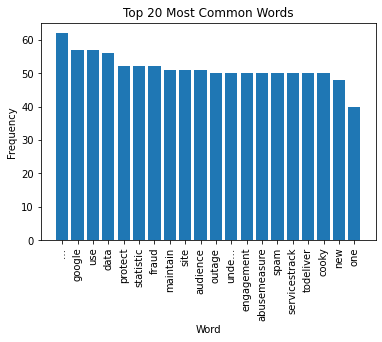

In [ ]:
words = df['lemmatize_text'].str.lower().str.split()

# Create a list to hold all the words
all_words = []

# Loop through the list of words and add them to the all_words list
for word_list in words:
    all_words += word_list

# Create a Pandas series to count the occurrences of each word
word_counts = pd.Series(all_words).value_counts()

# Select the top 20 most common words
top_words = word_counts[:20]

# Create a bar chart of the top 20 most common words
plt.bar(top_words.index, top_words.values)
plt.title('Top 20 Most Common Words')
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.show()

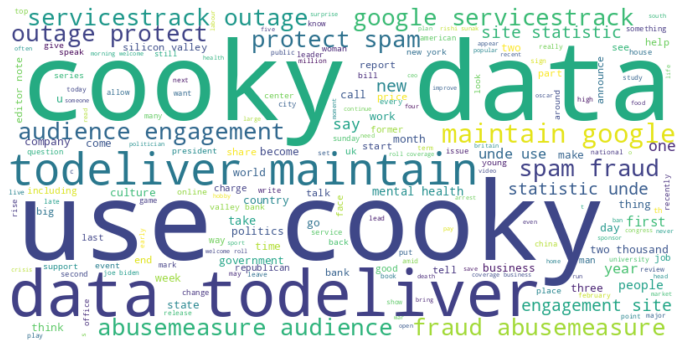

In [ ]:
# Concatenate all the text in the column into a single string
text = ' '.join(df['lemmatize_text'])

# Create a WordCloud object with the desired parameters
wordcloud = WordCloud(width=800, height=400, background_color='white', max_words=200).generate(text)

# Display the word cloud
plt.figure(figsize=(12, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

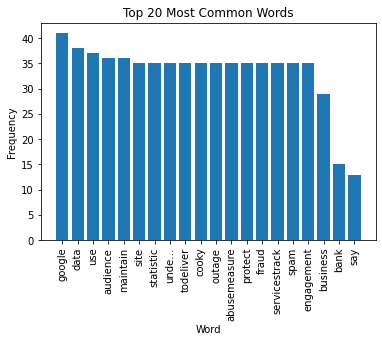

In [ ]:
from collections import Counter
df_bis = df[df['keywords'] == 'business'] 
words = df_bis['lemmatize_text'].str.lower().str.split()

# Create a list to hold all the words
all_words = []

# Loop through the list of words and add them to the all_words list
for word_list in words:
    all_words += word_list

# Create a Pandas series to count the occurrences of each word
word_counts = pd.Series(all_words).value_counts()

# Select the top 20 most common words
top_words = word_counts[:20]

# Create a bar chart of the top 20 most common words
plt.bar(top_words.index, top_words.values)
plt.title('Top 20 Most Common Words')
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.show()

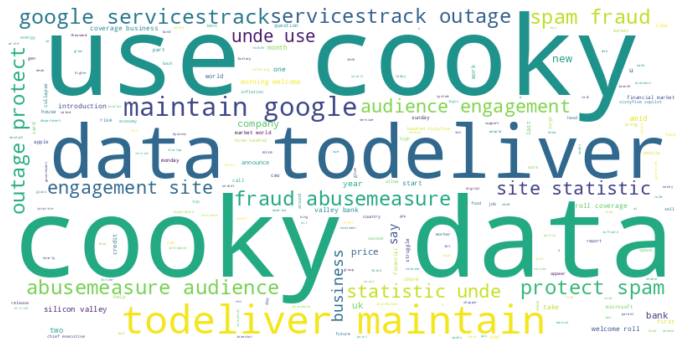

In [ ]:
# Concatenate all the text in the column into a single string
text = ' '.join(df_bis['lemmatize_text'])

# Create a WordCloud object with the desired parameters
wordcloud = WordCloud(width=800, height=400, background_color='white', max_words=200).generate(text)

# Display the word cloud
plt.figure(figsize=(12, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

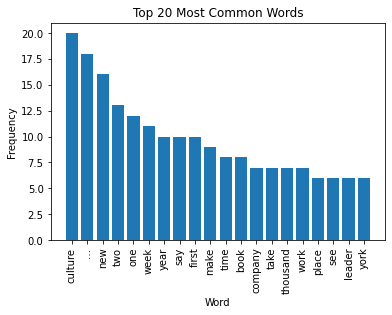

In [ ]:
from collections import Counter
df_cultures = df[df['keywords'] == 'culture'] 
words = df_cultures['lemmatize_text'].str.lower().str.split()

# Create a list to hold all the words
all_words = []

# Loop through the list of words and add them to the all_words list
for word_list in words:
    all_words += word_list

# Create a Pandas series to count the occurrences of each word
word_counts = pd.Series(all_words).value_counts()

# Select the top 20 most common words
top_words = word_counts[:20]

# Create a bar chart of the top 20 most common words
plt.bar(top_words.index, top_words.values)
plt.title('Top 20 Most Common Words')
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.show()

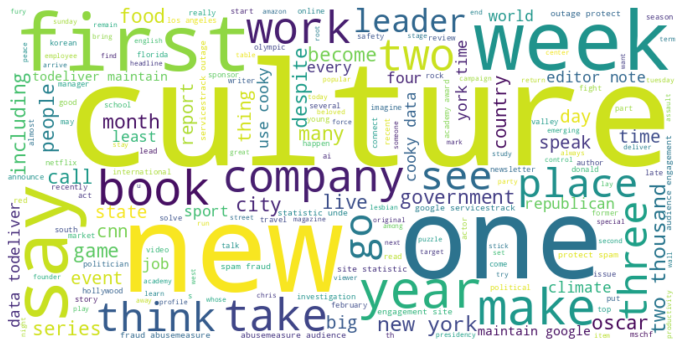

In [ ]:
# Concatenate all the text in the column into a single string
text = ' '.join(df_cultures['lemmatize_text'])

# Create a WordCloud object with the desired parameters
wordcloud = WordCloud(width=800, height=400, background_color='white', max_words=200).generate(text)

# Display the word cloud
plt.figure(figsize=(12, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

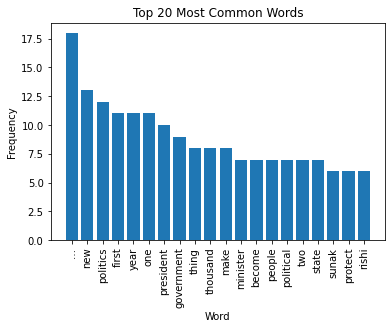

In [ ]:
from collections import Counter
df_polit = df[df['keywords'] == 'politics'] 
words = df_polit['lemmatize_text'].str.lower().str.split()

# Create a list to hold all the words
all_words = []

# Loop through the list of words and add them to the all_words list
for word_list in words:
    all_words += word_list

# Create a Pandas series to count the occurrences of each word
word_counts = pd.Series(all_words).value_counts()

# Select the top 20 most common words
top_words = word_counts[:20]

# Create a bar chart of the top 20 most common words
plt.bar(top_words.index, top_words.values)
plt.title('Top 20 Most Common Words')
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.show()

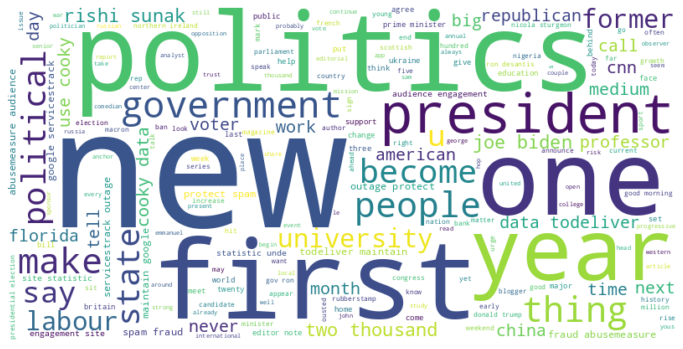

In [ ]:
# Concatenate all the text in the column into a single string
text = ' '.join(df_polit['lemmatize_text'])

# Create a WordCloud object with the desired parameters
wordcloud = WordCloud(width=800, height=400, background_color='white', max_words=200).generate(text)

# Display the word cloud
plt.figure(figsize=(12, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

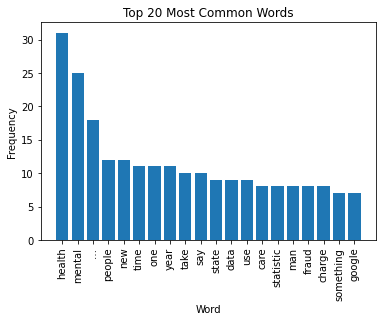

In [ ]:
from collections import Counter
df_healths = df[df['keywords'] == "mental health"]
words = df_healths['lemmatize_text'].str.lower().str.split()

# Create a list to hold all the words
all_words = []

# Loop through the list of words and add them to the all_words list
for word_list in words:
    all_words += word_list

# Create a Pandas series to count the occurrences of each word
word_counts = pd.Series(all_words).value_counts()

# Select the top 20 most common words
top_words = word_counts[:20]

# Create a bar chart of the top 20 most common words
plt.bar(top_words.index, top_words.values)
plt.title('Top 20 Most Common Words')
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.show()

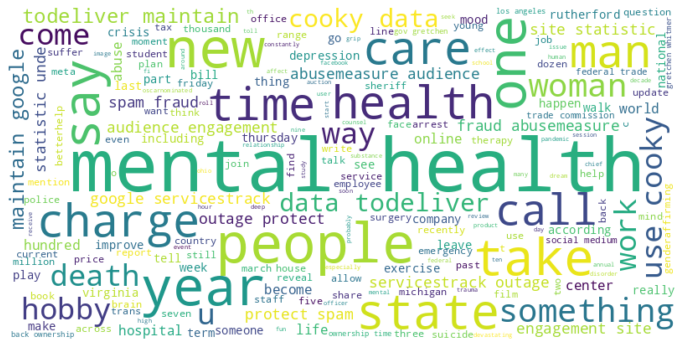

In [ ]:
# Concatenate all the text in the column into a single string
text = ' '.join(df_healths['lemmatize_text'])

# Create a WordCloud object with the desired parameters
wordcloud = WordCloud(width=800, height=400, background_color='white', max_words=200).generate(text)

# Display the word cloud
plt.figure(figsize=(12, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
words_to_remove = ['mental', 'mental health', 'politics', 'health','first', 'culture', 'political', 'year', 'cooky', 'u','one', 'new']

# Define a lambda function to split the text into words and remove unwanted words
def process_text(text):
    words = text.split()
    words = [word for word in words if word.lower() not in words_to_remove]
    return ' '.join(words)

# Apply the lambda function to the text column
df['new'] = df['lemmatize_text'].apply(process_text)

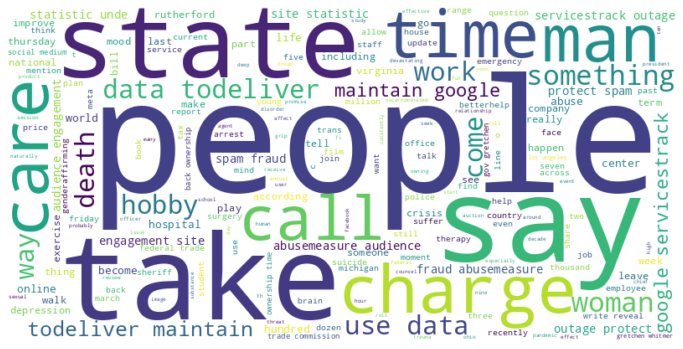

In [ ]:
# Concatenate all the text in the column into a single string
df_healths = df[df['keywords'] == "mental health"]
text = ' '.join(df_healths['new'])

# Create a WordCloud object with the desired parameters
wordcloud = WordCloud(width=800, height=400, background_color='white', max_words=200).generate(text)

# Display the word cloud
plt.figure(figsize=(12, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

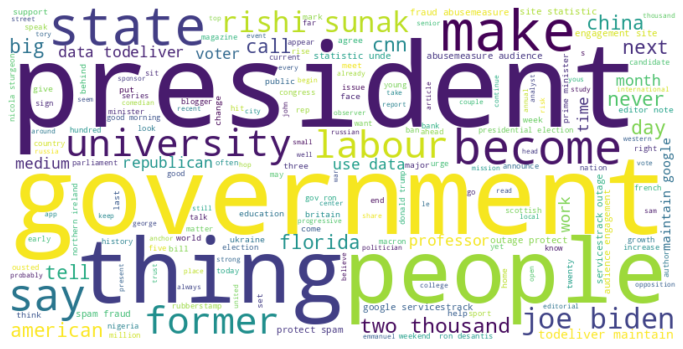

In [ ]:
# Concatenate all the text in the column into a single string
df_polit = df[df['keywords'] == "politics"]
text = ' '.join(df_polit['new'])

# Create a WordCloud object with the desired parameters
wordcloud = WordCloud(width=800, height=400, background_color='white', max_words=200).generate(text)

# Display the word cloud
plt.figure(figsize=(12, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

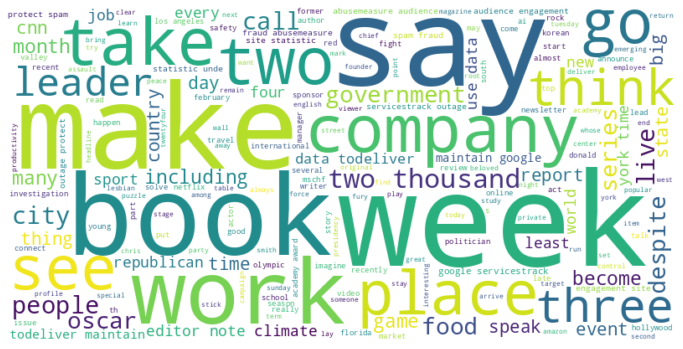

In [ ]:
# Concatenate all the text in the column into a single string
df_cult = df[df['keywords'] == "culture"]
text = ' '.join(df_cult['new'])

# Create a WordCloud object with the desired parameters
wordcloud = WordCloud(width=800, height=400, background_color='white', max_words=200).generate(text)

# Display the word cloud
plt.figure(figsize=(12, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

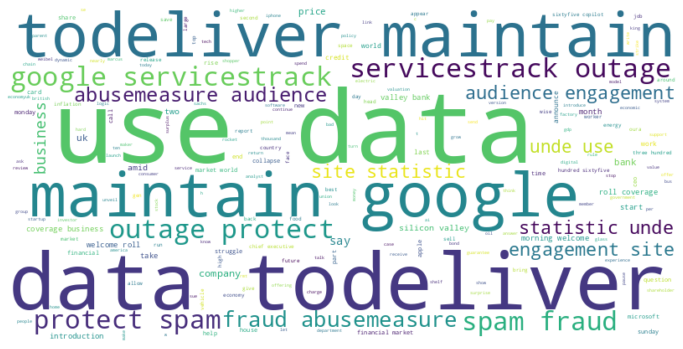

In [ ]:
# Concatenate all the text in the column into a single string
df_bis= df[df['keywords'] == "business"]
text = ' '.join(df_bis['new'])

# Create a WordCloud object with the desired parameters
wordcloud = WordCloud(width=800, height=400, background_color='white', max_words=200).generate(text)

# Display the word cloud
plt.figure(figsize=(12, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

#Sentiment analysis

In [ ]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

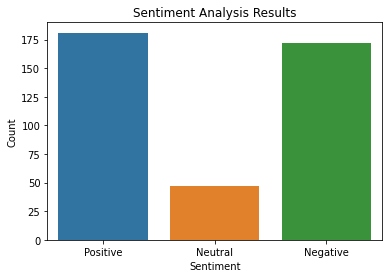

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Initialize the VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# Define a function to get the sentiment scores and labels for a single text string
def get_sentiment_scores(text):
    scores = analyzer.polarity_scores(text)
    if scores['compound'] > 0.05:
        return 'Positive'
    elif scores['compound'] < -0.05:
        return 'Negative'
    else:
        return 'Neutral'

# Apply the sentiment analysis function to the column of text
df['sentiment'] = df['lemmatize_text'].apply(get_sentiment_scores)

# Plot a bar chart of the sentiment counts
sns.countplot(x='sentiment', data=df, order=['Positive', 'Neutral', 'Negative'])
plt.title('Sentiment Analysis Results')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()


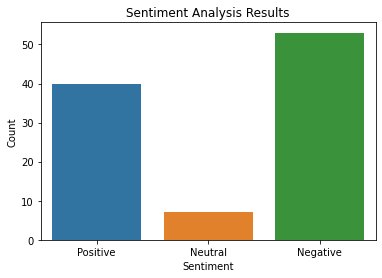

In [ ]:
df_bis= df[df['keywords'] == "business"]
# Plot a bar chart of the sentiment counts
sns.countplot(x='sentiment', data=df_bis, order=['Positive', 'Neutral', 'Negative'])
plt.title('Sentiment Analysis Results')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()


In [ ]:
print(df_bis.iloc[10,15])
print(df_bis.iloc[10,14])

Positive
enlarge lenovos thinkpad x1 carbon gen 1016 arguably best business laptop market lenovos thinkpad x1 carbon gen ten discounted fifty percent gen ten version…


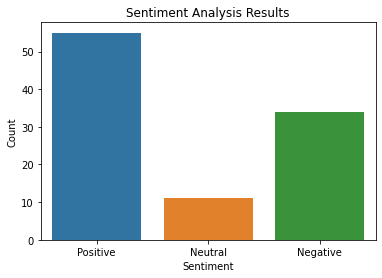

In [ ]:
df_cult= df[df['keywords'] == "culture"]
# Plot a bar chart of the sentiment counts
sns.countplot(x='sentiment', data=df_cult, order=['Positive', 'Neutral', 'Negative'])
plt.title('Sentiment Analysis Results')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()


In [ ]:
print(df_cult.iloc[10,15])
print(df_cult.iloc[10,14])

Negative
merchant marine academy student say victim sexual assault remain reluctant report allege assailant way would prompt investigation report aca…


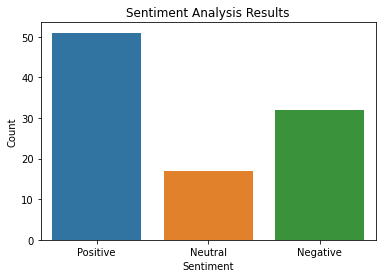

In [ ]:
df_pol= df[df['keywords'] == "politics"]
# Plot a bar chart of the sentiment counts
sns.countplot(x='sentiment', data=df_pol, order=['Positive', 'Neutral', 'Negative'])
plt.title('Sentiment Analysis Results')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

In [ ]:
print(df_pol.iloc[10,15])
print(df_pol.iloc[10,14])

Negative
use data todeliver maintain google servicestrack outage protect spam fraud abusemeasure audience engagement site statistic unde…


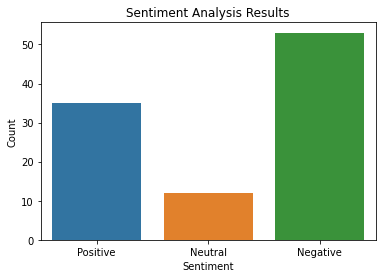

In [ ]:
df_mental= df[df['keywords'] == "mental health"]
# Plot a bar chart of the sentiment counts
sns.countplot(x='sentiment', data=df_mental, order=['Positive', 'Neutral', 'Negative'])
plt.title('Sentiment Analysis Results')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

In [ ]:
print(df_mental.iloc[10,15])
print(df_mental.iloc[10,14])

Neutral
film studio a24 auctioning dozen prop costume memorabilia oscarnominated film everything everywhere charitythe auction contains total fortythree …


#Modeling


In [ ]:
df['snow_for_model'] = df['snowball_stemmer'].apply(lambda x: ' '.join(x))

In [ ]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df['snow_for_model'])
y = df['keywords']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Train a Naive Bayes classifier on the training data
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)
nb_predictions = nb_model.predict(X_test)

# Evaluate the model using accuracy score and classification report
mlnbaccuracy = accuracy_score(y_test, nb_predictions)
report = classification_report(y_test, nb_predictions)
print('Naive Bayes Accuracy:', mlnbaccuracy)
print(classification_report(y_test, nb_predictions))

Naive Bayes Accuracy: 0.6
               precision    recall  f1-score   support

     business       0.86      0.73      0.79        26
      culture       0.40      0.33      0.36        18
mental health       0.54      0.72      0.62        18
     politics       0.53      0.56      0.54        18

     accuracy                           0.60        80
    macro avg       0.58      0.59      0.58        80
 weighted avg       0.61      0.60      0.60        80



In [ ]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df['lemmatize_text'])
y = df['keywords']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

nb_predictions = nb_classifier.predict(X_test)
nb_accuracy = accuracy_score(y_test, nb_predictions)

print('Naive Bayes Accuracy:', nb_accuracy)
print(classification_report(y_test, nb_predictions))

Naive Bayes Accuracy: 0.55
               precision    recall  f1-score   support

     business       0.87      0.77      0.82        26
      culture       0.33      0.28      0.30        18
mental health       0.48      0.56      0.51        18
     politics       0.43      0.50      0.46        18

     accuracy                           0.55        80
    macro avg       0.53      0.53      0.52        80
 weighted avg       0.56      0.55      0.55        80



In [ ]:
svm_classifier = SVC(kernel='linear')
svm_classifier.fit(X_train, y_train)

svm_predictions = svm_classifier.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_predictions)

print('SVM Accuracy:', svm_accuracy)
print(classification_report(y_test, svm_predictions))


SVM Accuracy: 0.55
               precision    recall  f1-score   support

     business       1.00      0.62      0.76        26
      culture       0.40      0.44      0.42        18
mental health       0.43      0.56      0.49        18
     politics       0.48      0.56      0.51        18

     accuracy                           0.55        80
    macro avg       0.58      0.54      0.55        80
 weighted avg       0.62      0.55      0.57        80



In [ ]:
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
lr_predictions = lr_model.predict(X_test)
lr_accuracy = accuracy_score(y_test, svm_predictions)

print('LR Accuracy:', lr_accuracy)
print(classification_report(y_test, svm_predictions))

LR Accuracy: 0.55
               precision    recall  f1-score   support

     business       1.00      0.62      0.76        26
      culture       0.40      0.44      0.42        18
mental health       0.43      0.56      0.49        18
     politics       0.48      0.56      0.51        18

     accuracy                           0.55        80
    macro avg       0.58      0.54      0.55        80
 weighted avg       0.62      0.55      0.57        80

